# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [166]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

Remove the null values and outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   333 non-null    float64
 1   culmen_depth_mm    333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


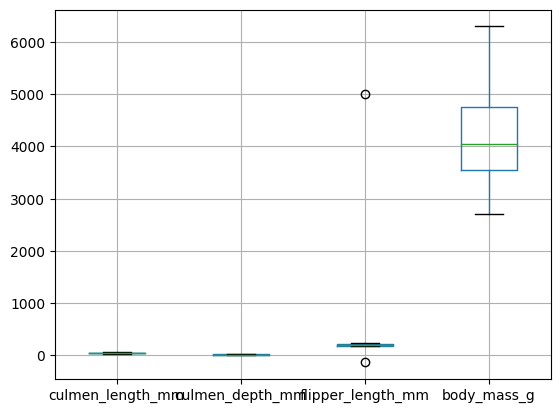

In [167]:
penguins_nonull = penguins_df.dropna()
penguins_df.boxplot()
penguins_clean = penguins_nonull[(penguins_nonull["flipper_length_mm"] < 1000) & (penguins_nonull["flipper_length_mm"] > 0)]
penguins_clean.info()

Pre-process the cleaned dataset

In [168]:
df = pd.get_dummies(penguins_clean).drop("sex_.", axis=1)
df_scaled = StandardScaler().fit_transform(df)
penguins_preprocessed = pd.DataFrame(df_scaled)

Perform PCA

In [169]:
pca_perform = PCA().fit(penguins_preprocessed)
n_components = sum(pca_perform.explained_variance_ratio_ > 0.10)

pca_precise = PCA(n_components = n_components)
precise_penguins_PCA = pca_precise.fit_transform(penguins_preprocessed)
penguins_PCA = pd.DataFrame(precise_penguins_PCA)

n_components, df.head() 

(2,
    culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
 0              39.1             18.7  ...           0         1
 1              39.5             17.4  ...           1         0
 2              40.3             18.0  ...           1         0
 4              36.7             19.3  ...           1         0
 5              39.3             20.6  ...           0         1
 
 [5 rows x 6 columns])

K-means cluster

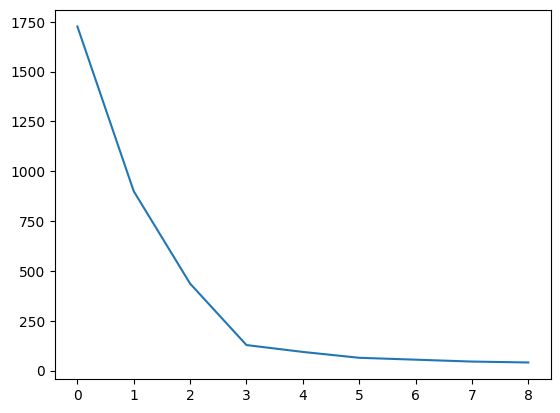

In [170]:
inertia_list = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_PCA)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(inertia_list)

n_clusters = 4

Create and fit the new k-means cluster model

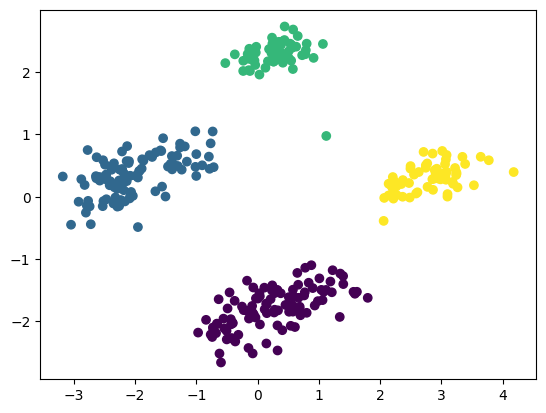

In [171]:
# Notes for my own review: if penguins_PCA is a pandas array, then use penguins_PCA.iloc[:, 0]; if if it is a numpy array, then use the following code.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA.iloc[:, 0], penguins_PCA.iloc[:, 1], c=kmeans.labels_)

Add the label column extracted from the k-means clustering

In [172]:
penguins_clean["label"] = kmeans.labels_

Create the statistical table

In [173]:
numeric_columns = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
